# Compare All Models (No Augmentation)



In [ ]:
import os
import numpy as np
import keras
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import zipfile
import shutil


# unzip file
zip_file_path = '/content/SOCOFing.zip'
extracted_path = 'extracted_socofing'

if not os.path.exists(extracted_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)

In [ ]:
import keras
from sklearn.metrics import roc_curve, auc

In [ ]:
import importlib
import data_utils
import os
import tensorflow as tf
import numpy as np

importlib.reload(data_utils)

organized_dataset_path = 'organized_fingerprint_dataset'
test_dir = os.path.join(organized_dataset_path, 'test')

image_size = (224, 224)
batch_size = 10

# load validation data
_, test_ds, class_names = data_utils.create_image_datasets(
    test_dir,
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle_train=False,
    shuffle_test=False
)

AUTOTUNE = tf.data.AUTOTUNE
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
true_labels = np.concatenate([y.numpy() for x, y in test_ds], axis=0)
true_labels = true_labels.astype(np.int64)

print("Test dataset loaded and prepared.")
print(f"Number of test samples: {len(true_labels)}")

Found 40 files belonging to 2 classes.
Found 40 files belonging to 2 classes.
Class names: ['Altered', 'Real']
Test dataset loaded and prepared.
Number of test samples: 40


In [ ]:
# Load the three trained models
baseline_resnet50_model = keras.models.load_model("baseline_resnet50.keras")
mobilenetv2_model = keras.models.load_model("base_mobilenetv2.keras")
efficientnetb0_model = keras.models.load_model("base_model_efficientnetb0.keras")

print("All three models loaded successfully.")

# Generate predictions for each model on the test dataset
baseline_resnet50_predictions = baseline_resnet50_model.predict(test_ds)
mobilenetv2_predictions = mobilenetv2_model.predict(test_ds)
efficientnetb0_predictions = efficientnetb0_model.predict(test_ds)

# Apply sigmoid activation to convert logits to probabilities
baseline_resnet50_probabilities = tf.sigmoid(baseline_resnet50_predictions).numpy()
mobilenetv2_probabilities = tf.sigmoid(mobilenetv2_predictions).numpy()
efficientnetb0_probabilities = tf.sigmoid(efficientnetb0_predictions).numpy()

print("Predictions generated for all models.")

All three models loaded successfully.
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 337ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 573ms/step
Predictions generated for all models.


AUC for Baseline ResNet50 Model: 0.8875
AUC for MobileNetV2 Model: 0.8125
AUC for EfficientNetB0 Model: 0.8175


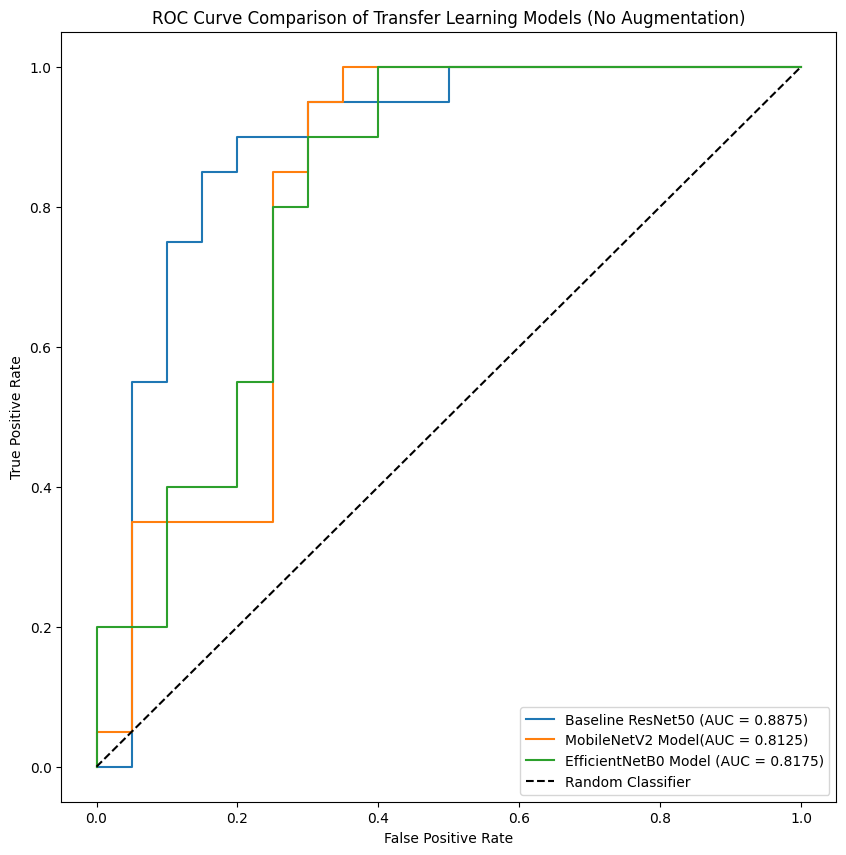

In [ ]:
# Calculate ROC curve and AUC for models
fpr_baseline_resnet50, tpr_baseline_resnet50, _ = roc_curve(true_labels, baseline_resnet50_probabilities)
roc_auc_baseline_resnet50 = auc(fpr_baseline_resnet50, tpr_baseline_resnet50)
fpr_mobilenetv2, tpr_mobilenetv2, _ = roc_curve(true_labels, mobilenetv2_probabilities)
roc_auc_mobilenetv2 = auc(fpr_mobilenetv2, tpr_mobilenetv2)
fpr_efficientnetb0, tpr_efficientnetb0, _ = roc_curve(true_labels, efficientnetb0_probabilities)
roc_auc_efficientnetb0 = auc(fpr_efficientnetb0, tpr_efficientnetb0)

# Print AUC values
print(f"AUC for Baseline ResNet50 Model: {roc_auc_baseline_resnet50:.4f}")
print(f"AUC for MobileNetV2 Model: {roc_auc_mobilenetv2:.4f}")
print(f"AUC for EfficientNetB0 Model: {roc_auc_efficientnetb0:.4f}")

plt.figure(figsize=(10, 10))

# Plot the ROC curves for all models
plt.plot(fpr_baseline_resnet50, tpr_baseline_resnet50, label=f'Baseline ResNet50 (AUC = {roc_auc_baseline_resnet50:.4f})')
plt.plot(fpr_mobilenetv2, tpr_mobilenetv2, label=f'MobileNetV2 Model(AUC = {roc_auc_mobilenetv2:.4f})')
plt.plot(fpr_efficientnetb0, tpr_efficientnetb0, label=f'EfficientNetB0 Model (AUC = {roc_auc_efficientnetb0:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Transfer Learning Models (No Augmentation)')
plt.legend()
plt.show()

## Summary:

*   The test dataset used for evaluation contained 40 samples.
*   The AUC values for the models were:
    *   Baseline ResNet50: 0.8875
    *   Non-augmented MobileNetV2: 0.8125
    *   Non-augmented EfficientNetB0: 0.8175




The ResNet50 architecture, even without data augmentation, demonstrated superior performance compared to the MobileNetV2 and EfficientNetB0 models on this specific small subset of the dataset.
This could be attributed to differences in the architectures and their ability to learn relevant features from the limited training data, or the effectiveness of the pre-trained ImageNet weights for this task on each architecture.
The non-augmented EfficientNetB0 performed reasonably well, suggesting its potential, but still lagged behind the ResNet50 in this comparison.
The non-augmented MobileNetV2 had the lowest AUC and accuracy scores, indicating it struggled more to generalize to the test set in this non-augmented scenario. Overall, the results suggest that ResNet50 offers the most balanced and reliable performance for this dataset.


### Next Steps

*   The ResNet50 architecture demonstrated superior performance without data augmentation compared to MobileNetV2 and EfficientNetB0 on this small dataset subset, potentially due to architectural differences or the effectiveness of pre-trained weights.
*   Future steps to improve these models could include comparing these non-augmented models with their augmented counterparts to assess the impact of data augmentation on each architecture's performance and fine-tuning the top layers of these models with a lower learning rate.